In [7]:
# Initial imports
import os
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import matplotlib.pyplot as plt 
from matplotlib.gridspec import GridSpec
import seaborn as sns
import quandl as qd
from dotenv import load_dotenv
load_dotenv()
%matplotlib inline

In [27]:
# Define tickers symbols
qd.ApiConfig.api_key = os.getenv('QUANDL_API_KEY')

ticker_symbols = ['AAPL']
start_year = '2015-1-1'
end_year = '2020-1-1'

stocks_df = pd.DataFrame()

for t in ticker_symbols:
    
    ticker_df = qd.get(f'EOD/{t}', start_date=start_year, end_date=end_year)

    # Save the close columns of each stock into new variables
    t = ticker_df['Close']

    stocks_df = stocks_df.append(t)

stocks_df = stocks_df.T
stocks_df.columns = ticker_symbols

stocks_df.head(10)

,AAPL
2015-01-02,109.33
2015-01-05,106.25
2015-01-06,106.26
2015-01-07,107.75
2015-01-08,111.89
2015-01-09,112.01
2015-01-12,109.25
2015-01-13,110.22
2015-01-14,109.80
2015-01-15,106.82


In [28]:
def analyse_my_stock_portfolio2(stocks, weighting, plot):

    print(f"This is your combined stock portfolio:\n {stocks}")
    print()

    #############################################################################################################################################
    ######################################################### Performance analysis ##############################################################
    #############################################################################################################################################

    #Calc daily returns
    daily_returns = stocks.pct_change().dropna()
    print()
    print()
    print(f"These are your daily returns:\n {daily_returns}")  
    print()  
    
    #Calc portfolio and cumulative returns
    #portfolio_return = combined_stock_df.dot(weighting[0:])
    portfolio_cum_return = (1+daily_returns).cumprod()  
                
   
    #Calc 21-day rolling std dev
    roll_std = daily_returns.rolling(window=21).std()

    #Calc correlation
    correlation = daily_returns.corr()
    print()
    print()
    print(f"This is your correlation matrix \n {correlation}")  
    print()      

    # Calculate Annualzied Sharpe Ratios
    sharpe_ratio = (daily_returns.mean()*252) / (daily_returns.std()*np.sqrt(252))
    print()
    print()
    print(f"This is your Sharpe Ratio:\n {sharpe_ratio}")  
    print()      

    #############################################################################################################################################
    ################################################################# PLOTS #####################################################################
    #############################################################################################################################################
                   
    # Plot daily returns
    if plot == 'daily_returns_line':
        fig = plt.figure()
        plot1 = daily_returns.plot(title='Daily returns', figsize=(15, 10))    
        plot1.set_xlabel("")

    #Plot daily returns_box    
    elif plot == 'daily_returns_box':
        fig = plt.figure()
        sns.boxplot(data=daily_returns).set_title('Daily returns')
        sns.set(rc={'figure.figsize':(15, 10)})

    # Plot cumulative returns
    elif plot == 'cumulative_returns':  
        fig = plt.figure()
        plot3 = portfolio_cum_return.plot(title='Cumulative Returns')
        plot3.set_xlabel("")
        
    #Plot 21-day rolling std dev
    elif plot == '21_day_roll':
        fig = plt.figure()
        plot4 = roll_std.plot(figsize=(15, 10), title='Rolling 21-day standard deviation')
        plot4.set_xlabel(" ")
        
    #Plot correlation
    elif plot == 'correlation':
        fig = plt.figure()
        mask = np.triu(np.ones_like(correlation, dtype=bool))
        cmap = sns.diverging_palette(230, 20, as_cmap=True)  
        sns.heatmap(correlation, vmin=-1, vmax=1, annot=True, cmap=cmap, mask=mask)
        sns.set(rc={'figure.figsize':(15,10)})
           
    #Plot Sharpe Ratio
    elif plot =='sharpe_ratio':        
        fig = plt.figure()
        sharpe_ratio = sharpe_ratio.plot(kind='bar', title='Sharpe ratios', edgecolor='red', color='black', ylabel='Sharpe ratio', xlabel='Portfolios', figsize=(15, 10))
   
    else: 
        pass
        
    fig.savefig(f"PerformanceAnalysis_{plot}_Summary.png")

    plt.show()

This is your combined stock portfolio:
               AAPL
2015-01-02  109.33
2015-01-05  106.25
2015-01-06  106.26
2015-01-07  107.75
2015-01-08  111.89
...            ...
2017-12-21  175.01
2017-12-22  175.01
2017-12-26  170.57
2017-12-27  170.60
2017-12-28  171.08

[754 rows x 1 columns]



These are your daily returns:
                 AAPL
2015-01-05 -0.028172
2015-01-06  0.000094
2015-01-07  0.014022
2015-01-08  0.038422
2015-01-09  0.001072
...              ...
2017-12-21  0.003785
2017-12-22  0.000000
2017-12-26 -0.025370
2017-12-27  0.000176
2017-12-28  0.002814

[753 rows x 1 columns]



This is your correlation matrix 
       AAPL
AAPL   1.0



This is your Sharpe Ratio:
 AAPL    0.768735
dtype: float64



<Figure size 432x288 with 0 Axes>

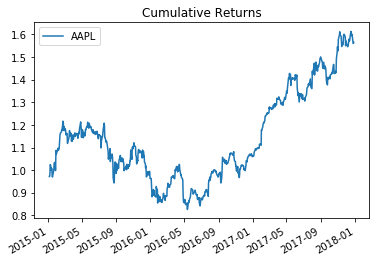

In [29]:
weight = [1/len(ticker_symbols)] * len(ticker_symbols)

analyse_my_stock_portfolio2(stocks_df, weight, plot='cumulative_returns')